#DECISION TREE

In [43]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Importing cars_clus.csv dataset
df=pd.read_csv('/content/sample_data/cars_clus.csv')

In [12]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   59 non-null     object 
 1   model      59 non-null     object 
 2   sales      59 non-null     float64
 3   resale     59 non-null     float64
 4   type       59 non-null     int64  
 5   price      59 non-null     float64
 6   engine_s   59 non-null     float64
 7   horsepow   59 non-null     int64  
 8   wheelbas   59 non-null     float64
 9   width      59 non-null     float64
 10  length     59 non-null     float64
 11  curb_wgt   59 non-null     float64
 12  fuel_cap   59 non-null     float64
 13  mpg        59 non-null     float64
 14  lnsales    59 non-null     float64
 15  partition  59 non-null     int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 7.5+ KB


In [13]:
# Categorical features of the data
df.describe(include='O')

,manufact,model
count,59,59
unique,13,59
top,Ford,Integra
freq,10,1


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('manufact').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['model'].value_counts()
    for x_label, grp in _df_5.groupby('manufact')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('manufact')
_ = plt.ylabel('model')

In [14]:
# View dataset
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [26]:
# Feature extraction
# Dividing the data into X,y
# X : Features
# y : Target
features=['horsepow','fuel_cap','price','wheelbas','curb_wgt','mpg','engine_s']
X=df[features]
y=df['type']

In [27]:
# View the data X, y
display(X.head(3), y.head(3))

,horsepow,fuel_cap,price,wheelbas,curb_wgt,mpg,engine_s
0,140,13.2,21.5,101.2,2.639,28.0,1.8
1,225,17.2,28.4,108.1,3.517,25.0,3.2
2,210,18.0,42.0,114.6,3.850,22.0,3.5


0    0
1    0
2    0
Name: type, dtype: int64

[Text(0.5555555555555556, 0.875, 'e <= 19.55\nentropy = 0.843\nsamples = 59\nvalue = [43, 16]'),
 Text(0.3333333333333333, 0.625, 'f <= 147.0\nentropy = 0.267\nsamples = 44\nvalue = [42, 2]'),
 Text(0.2222222222222222, 0.375, 'r <= 25.5\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.7777777777777778, 0.625, 'a <= 49.067\nentropy = 0.353\nsamples = 15\nvalue = [1, 14]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

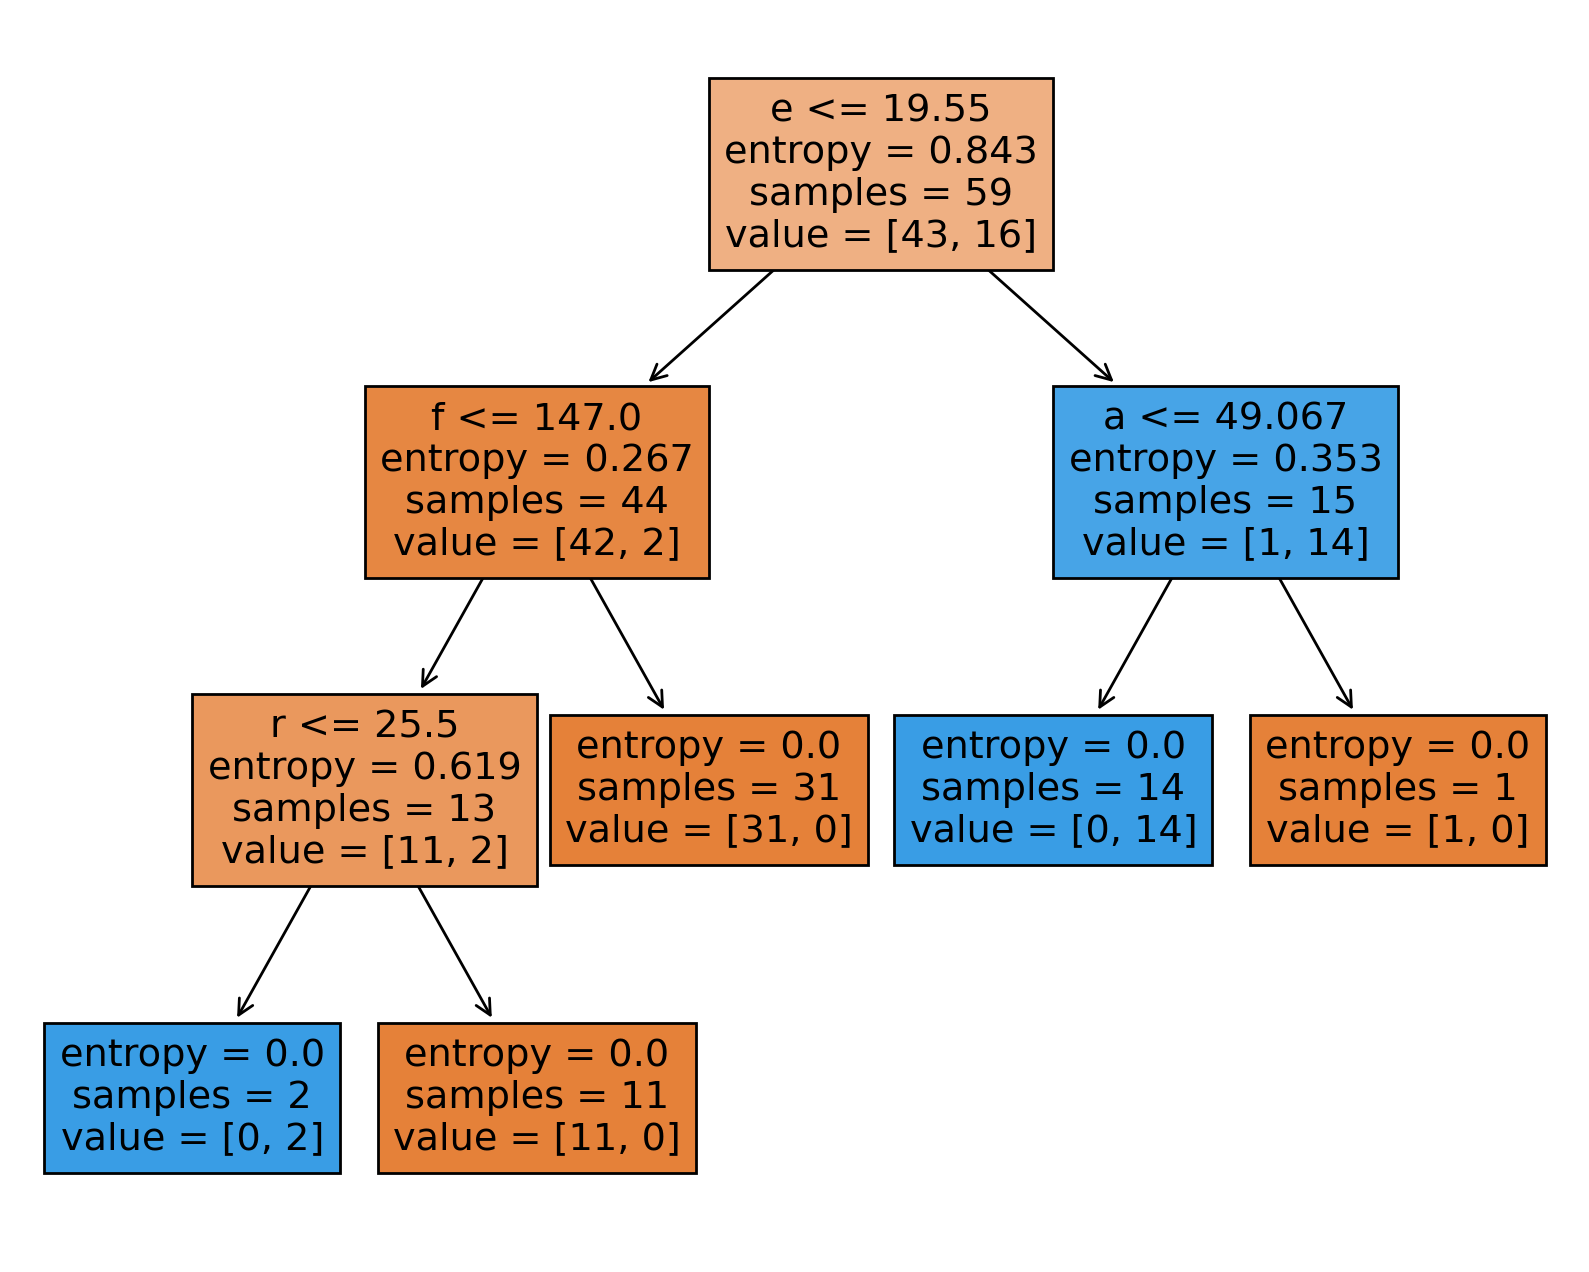

In [37]:
# Building the Decision Tree model on original dataset
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=12)
# Fitting the Model on original dataset
dtree=dtree.fit(X,y)
# Visual representation
plt.figure(figsize=(10,8),dpi=200)
tree.plot_tree(dtree,feature_names='features',filled =True)

[Text(0.4, 0.8333333333333334, 'e <= 19.55\nentropy = 0.82\nsamples = 47\nvalue = [35, 12]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.6, 0.5, 'a <= 49.067\nentropy = 0.391\nsamples = 13\nvalue = [1, 12]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

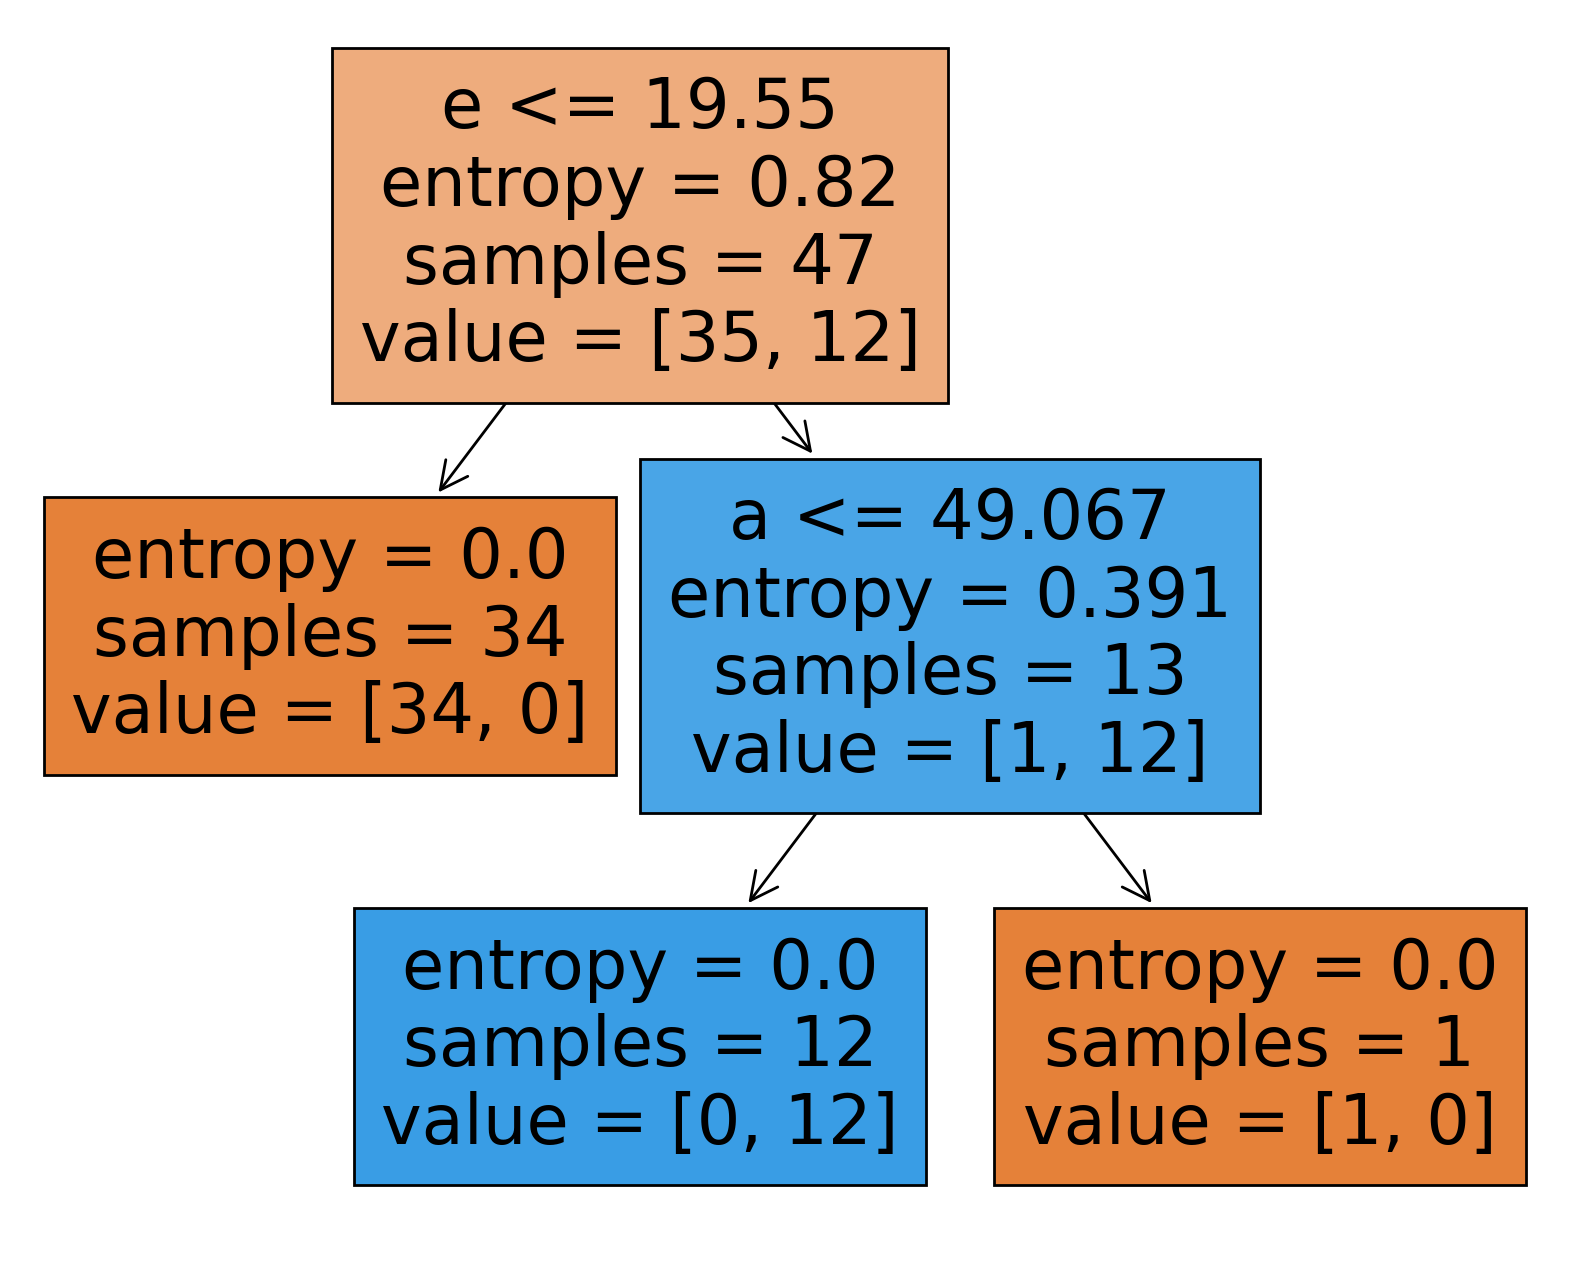

In [38]:
# Split the data into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)
# Building the model
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
# Fittng the model on train set
dtree=dtree.fit(X_train,y_train)
# Visual representation
plt.figure(figsize=(10,8),dpi=200)
tree.plot_tree(dtree,feature_names='features',filled =True)

In [40]:
# Model score on training set
dtree.score(X_train,y_train)


1.0

In [31]:
# Model score on testing set
dtree.score(X_test,y_test)

0.8333333333333334

In [32]:
# Testing using testing set
dt_pred=dtree.predict(X_test)

In [49]:
# Evaluating the model by its accuracy
dt_accuracy=accuracy_score(y_test,dt_pred)
print("Accuracy: ",dt_accuracy)

Accuracy:  0.8333333333333334


In [50]:
# Classification report
class_rep=classification_report(y_test,dt_pred)
print("Classification Report: \n",class_rep)

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12



Confusion Matrix: 
 [[8 0]
 [2 2]]


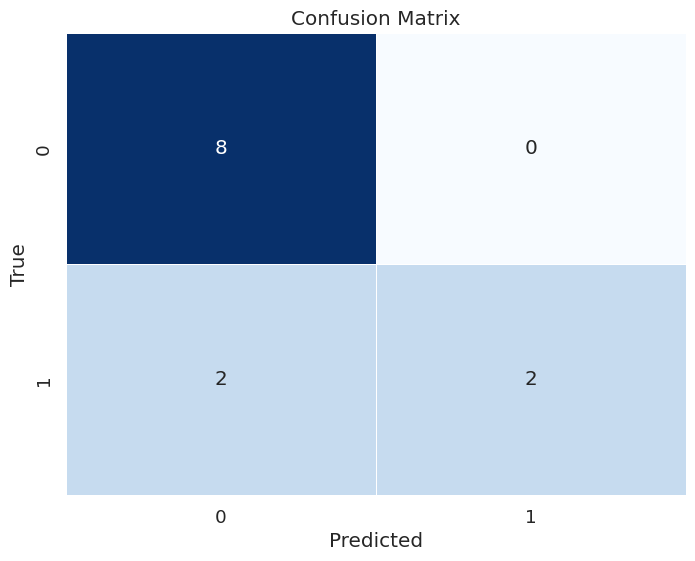

In [52]:
# Confusion matrics
conf_matrix=confusion_matrix(y_test,dt_pred)
print("Confusion Matrix: \n",conf_matrix)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()